___
# Ciência dos Dados - PROJETO 1

## Kevin Liu




## Estudo sobre  aparelhos que  as pessoas acessam a internet 

___
## Introdução



Eu pretendo analisar quais aparelhos pessoas de diferentes rendas,para fins de analise estão dividas em faixas de renda, utilizam para acessar a internet e se há alguma diferença ao longo dos anos da Pesquisa nas undidades Federativas Santa Catarina e Rio Grande do Sul


___
## Análise e Resultados

In [52]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [51]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/kevinliu8/Documents/Ciencias-dos-Dados/Projeto 1 


In [7]:
#Se usar o arquivo descompactado
dados = pd.read_csv('DOM2013.csv',sep=',')
dados.head()
#Se usar o arquivo compactado como está no dropbox púbico
#pd.read_csv('DOM2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')

,Unnamed: 0,V0101,UF,V0102,V0103,V0104,V0105,V0106,V0201,V0202,...,V2123,V2124,V2126,V2128,V2130,V2132,V2134,V2138,V2139,V9992
0,0,2013,11,15,1,11,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20150428
1,1,2013,11,15,2,10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20150428
2,2,2013,11,15,3,1,1.0,1.0,1.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20150428
3,3,2013,11,15,4,1,2.0,2.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20150428
4,4,2013,11,15,5,1,3.0,3.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20150428


In [125]:
dadosSc_2013 = dados[dados.V4621!=999999999999].loc[:,["V0101","UF","V02272","V02274","V02322","V02324","V02424","V02426","V02323","V02325","V02327","V4621"]] # SANTA Catarina # delimitando variaveis na coluna
#dadosSc.to_csv("resumo.csv")
dadosSc_2013.columns =["Ano","UF","Tv_assinatura","TV_antena_parabolica","Domicilio_com_internet","celular_com_internet","Uso_de_3G_ou_4G","internet_banda_larga","microcomputador","Tablet","outro_equipamento","Renda_mensal"]
dadosSc_2013 = dadosSc_2013[pd.notnull(dadosSc_2013.Renda_mensal)& pd.notnull(dadosSc_2013.Tv_assinatura)&pd.notnull(dadosSc_2013.TV_antena_parabolica)&pd.notnull(dadosSc_2013.Domicilio_com_internet)&pd.notnull(dadosSc_2013.Uso_de_3G_ou_4G)&pd.notnull(dadosSc_2013.internet_banda_larga)&pd.notnull(dadosSc_2013.microcomputador)&pd.notnull(dadosSc_2013.Tablet)&pd.notnull(dadosSc_2013.outro_equipamento)]
# muita pouca gente que acessa com outro equipamento

#Transformando em categoria 
dadosSc_2013.UF = dadosSc_2013.UF.astype("category")
dadosSc_2013.Tv_assinatura= dadosSc_2013.Tv_assinatura.astype("category") 
dadosSc_2013.TV_antena_parabolica = dadosSc_2013.TV_antena_parabolica.astype("category") 
dadosSc_2013.Domicilio_com_internet = dadosSc_2013.Domicilio_com_internet.astype("category") 
dadosSc_2013.celular_com_internet=dadosSc_2013.celular_com_internet.astype("category")
dadosSc_2013.Uso_de_3G_ou_4G=dadosSc_2013.Uso_de_3G_ou_4G.astype("category")
dadosSc_2013.internet_banda_larga=dadosSc_2013.internet_banda_larga.astype("category")
dadosSc_2013.microcomputador=dadosSc_2013.microcomputador.astype("category")
dadosSc_2013.Tablet=dadosSc_2013.Tablet.astype("category")
dadosSc_2013.outro_equipamento=dadosSc_2013.outro_equipamento.astype("category")


# Trocando os valores representativos(numeros) pelo seu significado
dadosSc_2013.UF.cat.categories = ("Rondonia","Acre","Amazonas","Roraima", \
"Pará","Amapá", "Tocantins", "Maranhão", "Piauí", "Ceará","Rio Grande do Norte","Paraíba", \
"Pernambuco","Alagoas","Sergipe","Bahia","Minas Gerais","Espírito Santo","Rio de Janeiro",\
"São Paulo","Paraná","Santa Catarina","Rio Grande do Sul","Mato Grosso do Sul","Mato Grosso","Goiás","Distrito Federal")

dadosSc_2013.Tv_assinatura.cat.categories =(["Sim","Não"])
dadosSc_2013.TV_antena_parabolica.cat.categories = (["Sim","Não","Não sabe"])
dadosSc_2013.Domicilio_com_internet.cat.categories = (["Sim"])
dadosSc_2013.celular_com_internet.cat.categories = (["Sim ","Não"])
dadosSc_2013.Uso_de_3G_ou_4G.cat.categories = (["Sim ","Não"])
dadosSc_2013.internet_banda_larga.cat.categories = (["Sim ","Não"])
dadosSc_2013.microcomputador.cat.categories = (["Sim ","Não"])
dadosSc_2013.Tablet.cat.categories = (["Sim ","Não"])
dadosSc_2013.outro_equipamento.cat.categories = (["Sim ","Não"])

dadosSc_2013 = dadosSc_2013[(dadosSc_2013.UF=="Santa Catarina")|(dadosSc_2013.UF== "Rio Grande do Sul")]

renda_baixa = dadosSc_2013[dadosSc_2013.Renda_mensal<=500] 
renda_baixa2 = dadosSc_2013[(dadosSc_2013.Renda_mensal>500)&(dadosSc_2013.Renda_mensal<=1400)]
renda_media = dadosSc_2013[(dadosSc_2013.Renda_mensal>1400)&(dadosSc_2013.Renda_mensal<=2100)]
renda_media2 = dadosSc_2013[(dadosSc_2013.Renda_mensal>2100)&(dadosSc_2013.Renda_mensal<=3200)]
renda_grande =dadosSc_2013[(dadosSc_2013.Renda_mensal>3200)&(dadosSc_2013.Renda_mensal<=4500)]
renda_grande2 = dadosSc_2013[dadosSc_2013.Renda_mensal>4500]
#dadosSc_2013.head()


 # Retirando usuarios nulos 
dadosSc_2013.to_csv("resumo.csv")

dadosSc_2013






,Ano,UF,Tv_assinatura,TV_antena_parabolica,Domicilio_com_internet,celular_com_internet,Uso_de_3G_ou_4G,internet_banda_larga,microcomputador,Tablet,outro_equipamento,Renda_mensal
116053,2013,Santa Catarina,Não,Não,Sim,Não,Sim,Não,Sim,Não,Não,1600.0
116054,2013,Santa Catarina,Não,Sim,Sim,Não,Não,Sim,Sim,Não,Não,700.0
116055,2013,Santa Catarina,Sim,Sim,Sim,Sim,Não,Sim,Sim,Não,Não,3633.0
116057,2013,Santa Catarina,Não,Sim,Sim,Não,Não,Sim,Sim,Não,Não,1428.0
116058,2013,Santa Catarina,Sim,Sim,Sim,Não,Não,Sim,Sim,Não,Não,433.0
116060,2013,Santa Catarina,Não,Sim,Sim,Sim,Não,Sim,Sim,Não,Não,1033.0
116061,2013,Santa Catarina,Sim,Sim,Sim,Sim,Não,Sim,Sim,Não,Não,933.0
116062,2013,Santa Catarina,Sim,Sim,Sim,Não,Não,Sim,Sim,Não,Não,1095.0
116063,2013,Santa Catarina,Não,Sim,Sim,Não,Não,Sim,Sim,Não,Não,746.0
116064,2013,Santa Catarina,Não,Não,Sim,Não,Não,Sim,Sim,Não,Não,1200.0


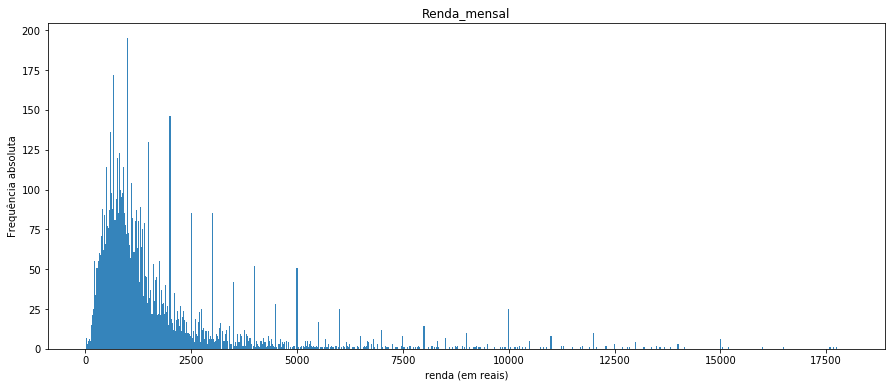

In [76]:
#renda_Sc = dadosSc_2013.Renda_mensal[dadosSc_2013.UF=="Santa Catarina"]
#renda
#renda_Rs = dadosSc_2013.Renda_mensal[dadosSc_2013.UF=="Rio Grande do Sul"]


faixa= range(10,18000,25)
plot = dadosSc_2013.Renda_mensal.plot.hist(bins=faixa,title='Renda_mensal', figsize=(15, 6), alpha=0.9)
plt.ylabel('Frequência absoluta')
plt.xlabel('renda (em reais)')

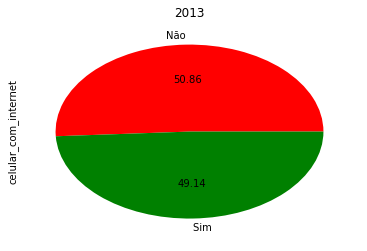

In [135]:
celular_com_internet = dadosSc_2013.celular_com_internet.value_counts()
celular_com_internet.plot(kind='pie', colors=('red', 'green'), autopct="%.2f", legend=False)
plt.title("2013")


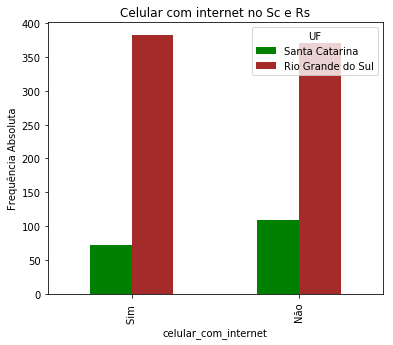

In [132]:
ct1 = pd.crosstab(renda_baixa.celular_com_internet,renda_baixa.UF)
ct1.plot(kind='bar', color=('green', 'brown'),figsize=(6,5))
plt.title("Celular com internet no Sc e Rs")
plt.ylabel('Frequência Absoluta')

#renda_Sc = dadosSc_2013.Renda_mensal[dadosSc_2013.UF=="Santa Catarina"] 
#renda_Sc_baixa
#dadosSc_2013.Renda_mensal.value_counts()
#renda_Sc_media2

In [126]:
#dadosSc_2013.Renda_mensal.describe()
#dadosSc_2013.groupby(by=dadosSc_2013.celular_com_internet).mean()
#dadosSc_2013.Renda_mensal.groupby(by=(renda_Sc_baixa,dadosSc_2013.celular_com_internet), sort=False).mean()

In [133]:
#microcomputador = pd.crosstab(renda_Sc_baixa,renda_Sc_baixa.celular_com_internet)
#microcomputador.plot(kind='bar', color=('red','yellow'),figsize=(15,6) ,legend=True)
#plt.ylabel('Frequência absoluta de renda baixa')

In [116]:
#dadosSc_2013.Renda_mensal.quantile(0.999)

In [117]:
#renda_Sc_baixa.describe()

In [22]:
# 2014
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [25]:
dados2 = pd.read_csv('DOM2014.csv',sep=',')
dados2.head(2)

,Unnamed: 0,V0101,UF,V0102,V0103,V0104,V0105,V0106,V0201,V0202,...,V4618,V4620,V4621,V4622,V4624,V33001,V33002,V33003,V33004,V9992
0,0,2014,11,15,1,1,3.0,2.0,1.0,2.0,...,1,3.0,500.0,3.0,2.0,1.0,NaN,3.0,NaN,20160624
1,1,2014,11,15,2,1,2.0,2.0,1.0,2.0,...,1,2.0,1150.0,4.0,1.0,1.0,NaN,3.0,NaN,20160624


In [30]:
dadosSc_2014 = dados2[dados2.V4621!=999999999999].loc[:,["V0101","UF","V02272","V02274","V02322","V02324","V02424","V02426","V02323","V02325","V02327","V4621"]] # SANTA Catarina # delimitando variaveis na coluna
#dadosSc.to_csv("resumo.csv")
dadosSc_2014.columns =["Ano","UF","Tv_assinatura","TV_antena_parabolica","Domicilio_com_internet","celular_com_internet","Uso_de_3G_ou_4G","internet_banda_larga","microcomputador","Tablet","outro_equipamento","Renda_mensal"]
dadosSc_2014 = dadosSc_2014[pd.notnull(dadosSc_2014.Renda_mensal)& pd.notnull(dadosSc_2014.Tv_assinatura)&pd.notnull(dadosSc_2014.TV_antena_parabolica)&pd.notnull(dadosSc_2014.Domicilio_com_internet)&pd.notnull(dadosSc_2014.Uso_de_3G_ou_4G)&pd.notnull(dadosSc_2014.internet_banda_larga)&pd.notnull(dadosSc_2014.microcomputador)&pd.notnull(dadosSc_2014.Tablet)&pd.notnull(dadosSc_2014.outro_equipamento)]
# muita pouca gente que acessa com outro equipamento

#Transformando em categoria 
dadosSc_2014.UF = dadosSc_2014.UF.astype("category")
dadosSc_2014.Tv_assinatura= dadosSc_2014.Tv_assinatura.astype("category") 
dadosSc_2014.TV_antena_parabolica = dadosSc_2014.TV_antena_parabolica.astype("category") 
dadosSc_2014.Domicilio_com_internet = dadosSc_2014.Domicilio_com_internet.astype("category") 
dadosSc_2014.celular_com_internet=dadosSc_2014.celular_com_internet.astype("category")
dadosSc_2014.Uso_de_3G_ou_4G=dadosSc_2014.Uso_de_3G_ou_4G.astype("category")
dadosSc_2014.internet_banda_larga=dadosSc_2014.internet_banda_larga.astype("category")
dadosSc_2014.microcomputador=dadosSc_2014.microcomputador.astype("category")
dadosSc_2014.Tablet=dadosSc_2014.Tablet.astype("category")
dadosSc_2014.outro_equipamento=dadosSc_2014.outro_equipamento.astype("category")


# Trocando os valores representativos(numeros) pelo seu significado
dadosSc_2014.UF.cat.categories = ("Rondonia","Acre","Amazonas","Roraima", \
"Pará","Amapá", "Tocantins", "Maranhão", "Piauí", "Ceará","Rio Grande do Norte","Paraíba", \
"Pernambuco","Alagoas","Sergipe","Bahia","Minas Gerais","Espírito Santo","Rio de Janeiro",\
"São Paulo","Paraná","Santa Catarina","Rio Grande do Sul","Mato Grosso do Sul","Mato Grosso","Goiás","Distrito Federal")

dadosSc_2014.Tv_assinatura.cat.categories =(["Sim","Não"])
dadosSc_2014.TV_antena_parabolica.cat.categories = (["Sim","Não","Não sabe"])
dadosSc_2014.Domicilio_com_internet.cat.categories = (["Sim"])
dadosSc_2014.celular_com_internet.cat.categories = (["Sim ","Não"])
dadosSc_2014.Uso_de_3G_ou_4G.cat.categories = (["Sim ","Não"])
dadosSc_2014.internet_banda_larga.cat.categories = (["Sim ","Não"])
dadosSc_2014.microcomputador.cat.categories = (["Sim ","Não"])
dadosSc_2014.Tablet.cat.categories = (["Sim ","Não"])
dadosSc_2014.outro_equipamento.cat.categories = (["Sim ","Não"])

dadosSc_2014 = dadosSc_2014[(dadosSc_2014.UF=="Santa Catarina")|(dadosSc_2014.UF== "Rio Grande do Sul")]
#dadosSc_2014.head()

 # Retirando usuarios nulos 
dadosSc_2014.to_csv("resumo2014.csv")

dadosSc_2014.head()



,Ano,UF,Tv_assinatura,TV_antena_parabolica,Domicilio_com_internet,celular_com_internet,Uso_de_3G_ou_4G,internet_banda_larga,microcomputador,Tablet,outro_equipamento,Renda_mensal
118216,2014,Santa Catarina,Não,Sim,Sim,Sim,Não,Sim,Sim,Não,Não,2400.0
118217,2014,Santa Catarina,Sim,Sim,Sim,Sim,Não,Sim,Sim,Não,Não,1100.0
118218,2014,Santa Catarina,Não,Sim,Sim,Sim,Não,Sim,Sim,Não,Não,572.0
118221,2014,Santa Catarina,Não,Sim,Sim,Sim,Sim,Sim,Sim,Não,Não,1566.0
118224,2014,Santa Catarina,Não,Sim,Sim,Sim,Sim,Não,Sim,Não,Não,1749.0


In [31]:
# 2015
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [34]:
dados3 = pd.read_csv('DOM2015.csv',sep=',')
dados3.head(2)

,Unnamed: 0,V0101,UF,V0102,V0103,V0104,V0105,V0106,V0201,V0202,...,V4611,V4614,UPA,V4617,V4618,V4620,V4621,V4622,V4624,V9992
0,0,2015,11,15,1,1,1.0,1.0,1.0,4.0,...,270.0,800.0,191,110001,1,1.0,800.0,4.0,1.0,20161104
1,1,2015,11,15,2,6,NaN,NaN,NaN,NaN,...,NaN,NaN,191,110001,1,NaN,NaN,NaN,NaN,20161104


In [39]:
dadosSc_2015 = dados3[dados3.V4621!=999999999999].loc[:,["V0101","UF","V02272","V02274","V02322","V02324","V02424","V02426","V02323","V02325","V02327","V4621"]] # SANTA Catarina # delimitando variaveis na coluna
#dadosSc.to_csv("resumo.csv")
dadosSc_2015.columns =["Ano","UF","Tv_assinatura","TV_antena_parabolica","Domicilio_com_internet","celular_com_internet","Uso_de_3G_ou_4G","internet_banda_larga","microcomputador","Tablet","outro_equipamento","Renda_mensal"]
dadosSc_2015 = dadosSc_2015[pd.notnull(dadosSc_2015.Renda_mensal)& pd.notnull(dadosSc_2015.Tv_assinatura)&pd.notnull(dadosSc_2015.TV_antena_parabolica)&pd.notnull(dadosSc_2015.Domicilio_com_internet)&pd.notnull(dadosSc_2015.Uso_de_3G_ou_4G)&pd.notnull(dadosSc_2015.internet_banda_larga)&pd.notnull(dadosSc_2015.microcomputador)&pd.notnull(dadosSc_2015.Tablet)&pd.notnull(dadosSc_2015.outro_equipamento)]
# muita pouca gente que acessa com outro equipamento

#Transformando em categoria 
dadosSc_2015.UF = dadosSc_2015.UF.astype("category")
dadosSc_2015.Tv_assinatura= dadosSc_2015.Tv_assinatura.astype("category") 
dadosSc_2015.TV_antena_parabolica = dadosSc_2015.TV_antena_parabolica.astype("category") 
dadosSc_2015.Domicilio_com_internet = dadosSc_2015.Domicilio_com_internet.astype("category") 
dadosSc_2015.celular_com_internet=dadosSc_2013.celular_com_internet.astype("category")
dadosSc_2015.Uso_de_3G_ou_4G=dadosSc_2015.Uso_de_3G_ou_4G.astype("category")
dadosSc_2015.internet_banda_larga=dadosSc_2015.internet_banda_larga.astype("category")
dadosSc_2015.microcomputador=dadosSc_2015.microcomputador.astype("category")
dadosSc_2015.Tablet=dadosSc_2015.Tablet.astype("category")
dadosSc_2015.outro_equipamento=dadosSc_2015.outro_equipamento.astype("category")


# Trocando os valores representativos(numeros) pelo seu significado
dadosSc_2015.UF.cat.categories = ("Rondonia","Acre","Amazonas","Roraima", \
"Pará","Amapá", "Tocantins", "Maranhão", "Piauí", "Ceará","Rio Grande do Norte","Paraíba", \
"Pernambuco","Alagoas","Sergipe","Bahia","Minas Gerais","Espírito Santo","Rio de Janeiro",\
"São Paulo","Paraná","Santa Catarina","Rio Grande do Sul","Mato Grosso do Sul","Mato Grosso","Goiás","Distrito Federal")

dadosSc_2015.Tv_assinatura.cat.categories =(["Sim","Não"])
dadosSc_2015.TV_antena_parabolica.cat.categories = (["Sim","Não","Não sabe"])
dadosSc_2015.Domicilio_com_internet.cat.categories = (["Sim"])
dadosSc_2015.celular_com_internet.cat.categories = (["Sim ","Não"])
dadosSc_2015.Uso_de_3G_ou_4G.cat.categories = (["Sim ","Não"])
dadosSc_2015.internet_banda_larga.cat.categories = (["Sim ","Não"])
dadosSc_2015.microcomputador.cat.categories = (["Sim ","Não"])
dadosSc_2015.Tablet.cat.categories = (["Sim ","Não"])
dadosSc_2015.outro_equipamento.cat.categories = (["Sim ","Não"])

dadosSc_2015 = dadosSc_2015[(dadosSc_2015.UF=="Santa Catarina")|(dadosSc_2015.UF== "Rio Grande do Sul")]
#dadosSc_2015.head()

 # Retirando usuarios nulos 
dadosSc_2015.to_csv("resumo.csv")

dadosSc_2015.head()



,Ano,UF,Tv_assinatura,TV_antena_parabolica,Domicilio_com_internet,celular_com_internet,Uso_de_3G_ou_4G,internet_banda_larga,microcomputador,Tablet,outro_equipamento,Renda_mensal
118087,2015,Santa Catarina,Não,Sim,Sim,NaN,Sim,Sim,Sim,Não,Não,333.0
118088,2015,Santa Catarina,Não,Sim,Sim,NaN,Sim,Não,Não,Sim,Não,1254.0
118090,2015,Santa Catarina,Sim,Sim,Sim,Não,Sim,Sim,Sim,Sim,Não,2000.0
118091,2015,Santa Catarina,Não,Sim,Sim,NaN,Sim,Não,Não,Não,Não,865.0
118092,2015,Santa Catarina,Não,Não,Sim,NaN,Sim,Sim,Sim,Não,Não,2160.0


___
## Conclusão 

Descreva aqui suas conclusões!